# **ESERCIZI LEZIONE 7**

### ***1.***

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
127,1960-08,606.0
128,1960-09,508.0
129,1960-10,461.0
130,1960-11,NaN


In [2]:
df['date'] = pd.to_datetime(df['date'])
df['mese_numerico'] = (df['date'].dt.year - 1949) * 12 + df['date'].dt.month
df.head(62)

,date,passengers,mese_numerico
0,1949-01-01,112.0,1
1,1949-02-01,118.0,2
2,1949-03-01,132.0,3
3,1949-04-01,129.0,4
4,1949-05-01,121.0,5
...,...,...,...
57,1953-10-01,211.0,58
58,1953-11-01,180.0,59
59,1953-12-01,201.0,60
60,1955-01-01,242.0,73


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = df[["mese_numerico"]].values

y = df["passengers"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=67, shuffle=False)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly2.fit(X_train, y_train)
y_pred_poly2 = model_poly2.predict(X_test)

In [4]:
import numpy as np
from sklearn.metrics import root_mean_squared_error

y_test_filled = np.nan_to_num(y_test, nan=0.0)
y_pred_linear_filled = np.nan_to_num(y_pred_linear, nan=0.0)

rmse_poly2 =  root_mean_squared_error(y_test_filled, y_pred_linear_filled)
rmse_poly2

88.37159082036491

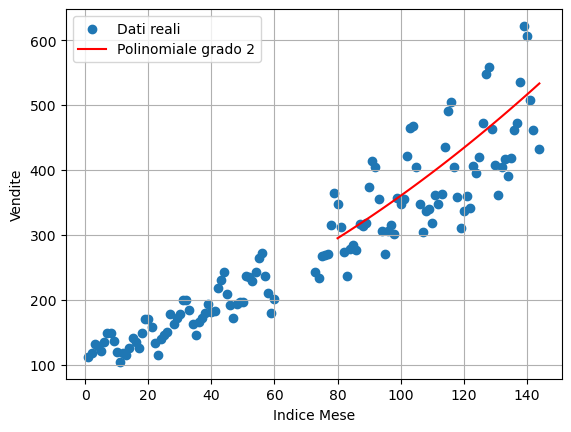

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label="Dati reali")
plt.plot(X_test, y_pred_poly2, label=f"Polinomiale grado 2", color = "red")
plt.xlabel("Indice Mese")
plt.ylabel("Vendite")
plt.legend()
plt.grid(True)
plt.show()

### ***2.***

In [6]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X[:, 0]**3 - X[:, 0] + np.random.normal(0, 3, size=100)

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Slider(id="grado", min=1, max=10, step=1, value=3,
               marks={i: str(i) for i in range(1, 11)}),
    dcc.Graph(id="grafico")
])

@app.callback(
    Output("grafico", "figure"),
    Input("grado", "value")
)

def aggiorna(grado):
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    X_grid = np.linspace(-3, 3, 300).reshape(-1, 1)
    y_pred = model.predict(poly.transform(X_grid))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X[:, 0], y=y, mode="markers", name="Dati"))
    fig.add_trace(go.Scatter(x=X_grid[:, 0], y=y_pred, mode="lines", name=f"Grado {grado}"))
    return fig

if __name__ == "__main__":
    app.run(debug=True)